In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools

import sys
import glob
import os
import re

In [2]:
RESULTS_DIR = 'Benchmark'
results_npVpy = pd.read_csv('..' + os.sep + RESULTS_DIR + os.sep + 'npVpy_results.csv') 
results_npVpy_size = pd.read_csv('..' + os.sep + RESULTS_DIR + os.sep + 'npVpy_size_results.csv') 

In [3]:
print(results_npVpy.shape)
results_npVpy

(90, 5)


,Type,Op,Size,Time,Iters
0,np,sum,1,2.006000e-06,10000
1,np,min,1,1.653000e-06,10000
2,np,max,1,1.963000e-06,10000
3,np,mul,1,1.313000e-06,10000
4,np,div,1,1.475000e-06,10000
5,py,sum,1,1.200000e-07,10000
6,py,min,1,9.500000e-08,10000
7,py,max,1,1.060000e-07,10000
8,py,mul,1,1.630000e-07,10000
9,py,div,1,1.690000e-07,10000


In [4]:
print(results_npVpy_size.shape)
results_npVpy_size

(18, 3)


,Type,Size,Bytes
0,np,1,8
1,py,1,96
2,np,10,80
3,py,10,384
4,np,100,800
5,py,100,3264
6,np,1000,8000
7,py,1000,32064
8,np,10000,80000
9,py,10000,320064


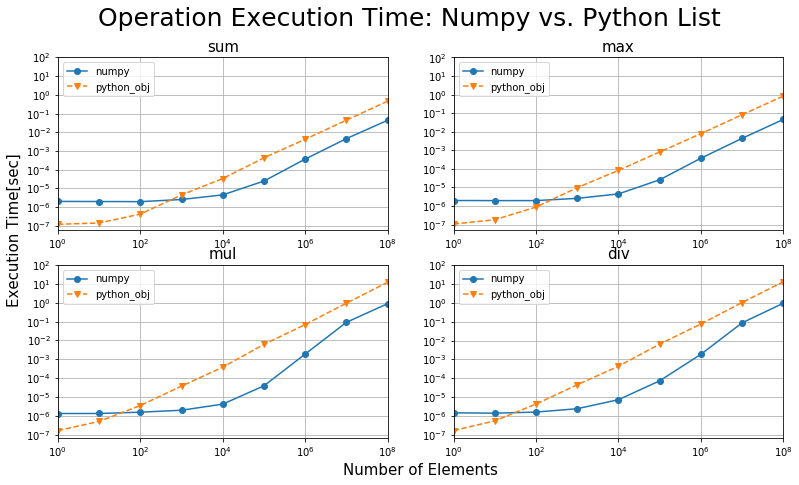

In [5]:
fig, axs = plt.subplots(2, 2, figsize=(13,7))
ops = [op for op in results_npVpy.Op.unique() if op != 'min']
legend_map = {'np': 'numpy', 'py': 'python_obj'}

for index, op in enumerate(ops):
    markers = itertools.cycle(['o', 'v', '^', 'X'])
    linestyle = itertools.cycle(['-', '--', ':', '-.'])
    legend = []    
    x = index // 2
    y = index % 2
    axs[x,y].set_xscale('log', basex=10)
    axs[x,y].set_yscale('log', basey=10)
    for typ in results_npVpy.Type.unique():
        pd.DataFrame(results_npVpy.loc[results_npVpy.Type == typ].loc[results_npVpy.Op == op]
                          ).plot(kind = 'line', 
                                 x = 'Size', 
                                 y = 'Time', 
                                 ax = axs[x,y], 
                                 marker=next(markers), 
                                 linestyle=next(linestyle))
        legend.append(legend_map[typ])
        
    axs[x,y].grid(True)
    axs[x,y].set_title(op, fontsize=15)
    axs[x,y].legend(legend, loc='upper left')
    y_axis_range = [100 / 10**x for x in np.arange(0, 10)] 
    axs[x,y].set_yticks(ticks = y_axis_range)
    

for ax in axs.flat:
    ax.set(xlabel='', ylabel = "")
fig.suptitle('Operation Execution Time: Numpy vs. Python List', fontsize = 25)
axs[1,1].set_xlabel('Number of Elements', fontsize = 15, position=(-.1,0))
axs[0,0].set_ylabel('Execution Time[sec]', fontsize = 15, position=(0,0))
plt.show()

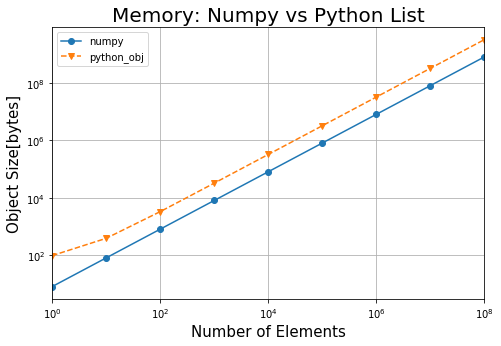

In [10]:
markers = itertools.cycle(['o', 'v', '^', 'X'])
linestyle = itertools.cycle(['-', '--', ':', '-.'])
legend = []

plt.figure(figsize=(7.75,5))
ax = plt.gca()
ax.set_xscale('log', basex=10)
ax.set_yscale('log', basey=10)
for typ in results_npVpy.Type.unique():
    pd.DataFrame(results_npVpy_size.loc[results_npVpy_size.Type == typ]
                ).plot(kind = 'line', 
                       x = 'Size', 
                       y = 'Bytes', 
                       ax = ax, 
                       marker=next(markers), 
                       linestyle=next(linestyle))
    legend.append(legend_map[typ])

ax.legend(legend, loc = 'best')
plt.grid(True)
plt.title(f'Memory: Numpy vs Python List', fontsize = 20)
plt.xlabel('Number of Elements', fontsize = 15)
plt.ylabel("Object Size[bytes]", fontsize =15)

plt.show()